# Proyecto Visión por Computadora
- Integrantes: Juan Sebastián Contreras, Sebastián Plazas
- Fecha: 25-05-2025


# 🚦 Monitoreo Inteligente de Congestión Vehicular en Intersecciones Críticas

## 📌 Resumen del problema

Las ciudades modernas enfrentan una creciente crisis de movilidad. En particular, las **intersecciones urbanas** son puntos neurálgicos donde el flujo vehicular se vuelve caótico, especialmente en horas pico. Esta **congestión constante genera consecuencias negativas tanto para la ciudadanía como para el medio ambiente**, incluyendo:

- **Pérdida de tiempo** para miles de personas diariamente.
- **Aumento del estrés** y la frustración por parte de conductores y peatones.
- **Crecimiento en la emisión de gases contaminantes** por vehículos detenidos o en tráfico lento.
- **Reducción en la productividad urbana** debido al atraso en desplazamientos.
- **Mayor riesgo de accidentes** por maniobras peligrosas y pasos no regulados.

Las soluciones tradicionales, como estudios manuales o semáforos preprogramados, no son suficientes para responder en tiempo real a estos retos.

---

## 💡 Propuesta de solución con Visión Computacional

Este proyecto propone un sistema basado en **Deep Learning y Visión Computacional** para monitorear automáticamente el comportamiento vehicular en intersecciones críticas, con el fin de proporcionar datos útiles para:

- Optimizar **tiempos de semáforo**.
- Detectar **puntos de congestión sistemática**.
- Apoyar en **toma de decisiones de movilidad urbana**.

---

## 🧠 Arquitectura técnica del sistema

El pipeline combina **múltiples tareas de visión computacional**, alineadas con los requisitos del curso:

1. **Detección de vehículos (YOLOv8):** identifica carros, buses, motos y camiones en tiempo real.
2. **Seguimiento de trayectorias (SORT):** permite analizar el flujo vehicular y detectar embotellamientos o bloqueos.

La combinación de estas tareas permite pasar de una simple imagen de tráfico a un conjunto de **datos útiles, dinámicos y cuantificables**.

---

## 🌍 Impacto social

Este sistema busca **mejorar la calidad de vida urbana** al:

- Reducir los tiempos de espera en intersecciones.
- Apoyar a alcaldías o secretarías de movilidad con datos reales y automáticos.
- Disminuir la huella ambiental del parque automotor.
- Habilitar futuras integraciones con **semáforos inteligentes** o plataformas de movilidad ciudadana.

---

## 🧪 Dataset utilizado

- **Dataset propio**: imágenes capturadas en campus o zonas de alto flujo vehicular (cumpliendo requisito del curso).


## 👨‍🏫 Conclusión

La visión computacional permite **convertir una imagen en una herramienta de toma de decisiones**. Mediante este proyecto, demostramos cómo la inteligencia artificial puede aportar soluciones prácticas a una problemática real que afecta a millones de personas: la movilidad urbana.

Este trabajo busca ser un aporte al desarrollo de **ciudades más inteligentes, sostenibles y humanas**.



# empezaremos con el código
primero empezaremos instalando e importando las liberías necesarias:
## instalaciónes


In [1]:

# #Instalación Inteligente para YOLOv8 en Google Colab 

# ##Solo correr si está en colab

# import importlib
# import pkg_resources
# from IPython.display import HTML, display

# def needs_reinstall(package, version_substring=None):
#     try:
#         dist = pkg_resources.get_distribution(package)
#         if version_substring and version_substring not in dist.version:
#             return True
#         return False
#     except pkg_resources.DistributionNotFound:
#         return True

# # ⚙️ Verificar si es necesario reinstalar
# REINSTALL_REQUIRED = (
#     needs_reinstall('torch', 'cu') or
#     needs_reinstall('ultralytics') or
#     needs_reinstall('supervision') or
#     needs_reinstall('opencv-python-headless') or
#     needs_reinstall('lap') or
#     needs_reinstall('norfair')
# )

# if REINSTALL_REQUIRED:
#     print("🛠️ Reinstalando dependencias para entorno limpio y GPU-ready...")

#     # Desinstalar versiones antiguas o conflictivas
#     !pip uninstall -y ultralytics supervision opencv-python-headless torch torchvision torchaudio numpy lap norfair supervision

#     # Instalar torch con soporte CUDA 11.8 (lo que usa Colab normalmente)
#     !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

#     # Reinstalar librerías necesarias para YOLOv8 + tracking
#     !pip install ultralytics supervision opencv-python-headless lap norfair

#     # ✅ Instala la versión reciente y estable con tracking incluido
#     !pip install -q git+https://github.com/roboflow/supervision.git

#     # instala roboflow para el dataset
#     !pip install roboflow

#     #descargamos sort
#     !wget https://raw.githubusercontent.com/abewley/sort/master/sort.py

#     # Mostrar mensaje para reiniciar
#     display(HTML("""
#     <h3>✅ Instalación completada.</h3>
#     <b>🔁 Por favor, reinicia el entorno:</b><br>
#     <code>Entorno de ejecución > Reiniciar entorno</code><br><br>
#     <i>Después de reiniciar, vuelve a ejecutar todas las celdas desde el inicio.</i>
#     """))
# else:
#     print("✅ El entorno ya tiene las versiones correctas. Puedes continuar sin reinstalar.")


In [ ]:
# ! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# ! pip install ultralytics supervision roboflow opencv-python-headless lap norfair
# #! Invoke-WebRequest -Uri https://raw.githubusercontent.com/abewley/sort/master/sort.py -OutFile sort.py
# ! pip install roboflow --quiet
# ! wget -O sort.py https://raw.githubusercontent.com/abewley/sort/master/sort.py



## Librerías

In [17]:
# 📦 Librerías esenciales
from roboflow import Roboflow
from ultralytics import YOLO
from sort import Sort

# 📚 Visualización y procesamiento
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import base64
import matplotlib.image as mpimg

# 📊 Análisis y reporte
import csv
from collections import Counter
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline


## 1. Detección:
Para esta tarea utilizaremos el modelo de YOLOv11 para detectar de las imagenes de cada frame , en esta parte incial con imágenes estáticas que simulen cada frame de video

primero importamos nuestro dataset orientado a detección de vehiculos

In [4]:


rf = Roboflow(api_key="ra6mYfUlyG51jKvAA9qV")
project = rf.workspace("vpc-9gvzh").project("my-first-project-ztiig")
version = project.version(3)
dataset = version.download("yolov11")
print(f"El dataset se descargó y se ubica en: {dataset.location}")

loading Roboflow workspace...
loading Roboflow project...
El dataset se descargó y se ubica en: c:\Users\admin\Downloads\universidad\2025-1\taller\taller_final\My-First-Project-3


Luego utilizando este dataset entrenamos el modelo de YOLOv11

note que esto solo lo hacemos en caso de que no exista el modelo creado anteriormente, si ya está creado lo dejamos ahí

In [ ]:


modelo_entrenado = r"runs/detect/entrenamiento_YOLOv11/weights/best.pt"
#modelo_entrenado = r"C:/Users/admin/Downloads/universidad/2025-1/taller/taller_final/runs/detect/entrenamiento_YOLOv84/weights/best.pt"

if not os.path.exists(modelo_entrenado):
    print("⚠️ Modelo no encontrado. Entrenando desde cero...")
    # 3. Cargar el modelo YOLOv8 preentrenado
    # Puedes usar 'yolov8n.pt' para velocidad o 'yolov8s.pt' para más precisión
    model = YOLO('yolo11n.pt')
    model.train(
        data=f"{dataset.location}/data.yaml",  # Ruta al archivo data.yaml generado por Roboflow
        epochs=50,
        imgsz=640,         # Tamaño de imagen: debe coincidir con tu resize de Roboflow
        batch=16,          # Ajusta según la RAM de Colab (16 o 8 suele estar bien)
        name='entrenamiento_YOLOv11',
        #workers=2,
        verbose=True
    )
else:
    print("✅ Modelo ya entrenado. Saltando entrenamiento...")
    model = YOLO(modelo_entrenado)


✅ Modelo ya entrenado. Saltando entrenamiento...


## Utilizamos el modelo entrenado para ver como funcionaría en una imagen individual

In [ ]:

# 3. Cargar el modelo YOLOv8 preentrenado
model = YOLO('runs/detect/entrenamiento_YOLOv11/weights/best.pt')
#model=YOLO('yolo11n.pt')

# 4. Cargar la imagen
image_path = 'imagenes/20250522_060645.jpg'
image = Image.open(image_path)

# 5. Hacer predicción
results = model.predict(image)

# 6. Mostrar la imagen con las detecciones
#results[0].show()  # Visualiza con cajas y etiquetas
annotated_image = results[0].plot()
# 7. Contar vehículos por tipo
from collections import Counter

#vehicle_classes = ['car', 'bus', 'truck', 'motorcycle',"bike"]
vehicle_classes = ['car', 'bus', 'truck', 'motorcycle']
detected_classes = [model.names[int(cls)] for cls in results[0].boxes.cls]

# Filtrar solo vehículos
vehicle_counts = Counter([cls for cls in detected_classes if cls in vehicle_classes])

# Mostrar resultados
print("🚦 Conteo de vehículos detectados:")
for vehicle, count in vehicle_counts.items():
    print(f"{vehicle.capitalize()}: {count}")



0: 480x640 3 buss, 10 cars, 2 motorcycles, 39.6ms
Speed: 3.4ms preprocess, 39.6ms inference, 72.8ms postprocess per image at shape (1, 3, 480, 640)
🚦 Conteo de vehículos detectados:
Car: 10
Motorcycle: 2
Bus: 3


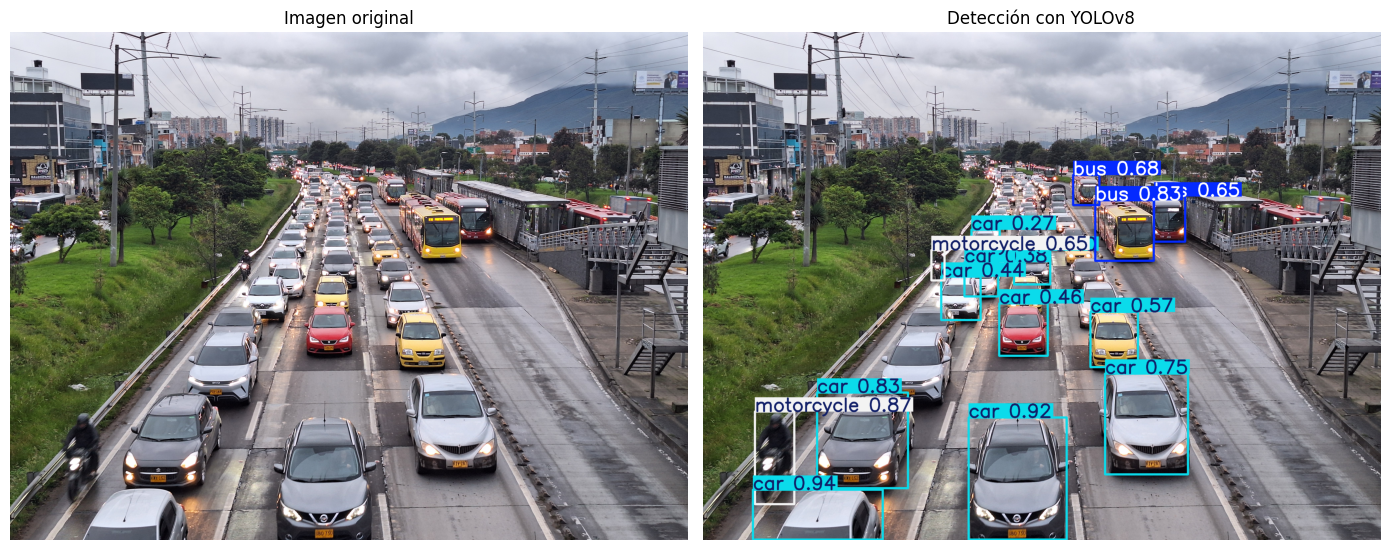

In [ ]:
# ✅ Mostrar la original y la detectada lado a lado
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Imagen original
axs[0].imshow(image)
axs[0].set_title("Imagen original")
axs[0].axis("off")

# Imagen con detecciones
axs[1].imshow(annotated_image_rgb)
axs[1].set_title("Detección con YOLOv8")
axs[1].axis("off")

plt.tight_layout()
plt.savefig("imagenes/comparativa.jpg")
plt.show()

## ahora probamos con video y lo reproducimos



In [ ]:
# 4. Definir clases de interés
#vehicle_classes = ['car', 'bus', 'truck', 'motorcycle']

# 5. Ruta del video
video_path = 'videos/20250522_061210.mp4' 
cap = cv2.VideoCapture(video_path)

# 6. Configurar salida de video
width = int(cap.get(3))
height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

output_path = 'videos/detección_entrenado.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# 7. Procesar cada frame
print("🚦 Procesando video...")
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detección
    results = model.predict(frame, verbose=False)

    # Dibujar cajas
    annotated_frame = results[0].plot()

    # Contar vehículos
    detected_classes = [model.names[int(cls)] for cls in results[0].boxes.cls]
    vehicle_counts = Counter([cls for cls in detected_classes if cls in vehicle_classes])

    # Agregar conteo al frame
    y = 30
    for i, (vehicle, count) in enumerate(vehicle_counts.items()):
        text = f"{vehicle.capitalize()}: {count}"
        cv2.putText(annotated_frame, text, (10, y + i*30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
    

    # Escribir frame en salida
    out.write(annotated_frame)

# 8. Limpiar recursos (SIN destroyAllWindows)
cap.release()
out.release()
print("✅ Video procesado y guardado como:", output_path)

🚦 Procesando video...
✅ Video procesado y guardado como: C:/Users/admin/Downloads/universidad/2025-1/taller/taller_final/videos/detección_entrenado.mp4


In [9]:


def reproducir_video_local(path):
    cap = cv2.VideoCapture(path)

    if not cap.isOpened():
        print("❌ No se pudo abrir el video.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        cv2.imshow("Video YOLOv8", frame)

        # Salir al presionar 'q'
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

reproducir_video_local(output_path)

## Tracking


Como buscamos hacer un procesamiento rápido buscamos un algoritmo de tracking ligero, para esto utilizaremos el SORT clasico (Simple Online and Realtime Tracking) el cual es un algoritmo de ͏tracking lí͏gero, note que  SORT no ne͏ce͏sita entrenamiento, lo que hace que sea bue͏no unirse a mod͏elos de d͏etección como YOLOv8 en momentos donde ͏se necesita rapidez y sencillez.

Vamos a probarlo con el͏ mismo v͏ideo viejo par͏a ver cómo funciona.

In [ ]:
# 4. Definir clases de interés
#vehicle_classes = ['car', 'bus', 'truck', 'motorcycle']


# Inicializar tracker SORT
tracker = Sort()

# 5. Ruta del video
video_path = 'videos/20250522_061210.mp4' 
cap = cv2.VideoCapture(video_path)

# 6. Configurar salida de video
width = int(cap.get(3))
height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

output_path = 'videos/video_sort_tracking.mp4'

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# 7. Procesar cada frame
print("🚦 Procesando video con SORT tracking ...")
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detección
    results = model.predict(frame, verbose=False)
    boxes = results[0].boxes

    # Convertir detecciones a formato [x1, y1, x2, y2, conf]
    detections = []
    detected_classes = []
    for i in range(len(boxes.cls)):
        cls_id = int(boxes.cls[i])
        cls_name = model.names[cls_id]
        if cls_name in vehicle_classes:
            x1, y1, x2, y2 = boxes.xyxy[i].tolist()
            conf = boxes.conf[i].item()
            detections.append([x1, y1, x2, y2, conf])
            detected_classes.append(cls_name)

    # Aplicar SORT solo si hay detecciones
    if len(detections) > 0:
        tracks = tracker.update(np.array(detections))
    else:
        tracks = []

    # Dibujar cajas y conteo
    annotated_frame = frame.copy()
    vehicle_counts = Counter(detected_classes)
    for i, track in enumerate(tracks):
        x1, y1, x2, y2, track_id = track.astype(int)
        if i < len(detected_classes):
            label = detected_classes[i]
            if label in vehicle_classes:
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(annotated_frame, f'ID {track_id} - {label}', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

    # Conteo por tipo (esquina superior izquierda)
    y_offset = 30
    for i, (vehicle, count) in enumerate(vehicle_counts.items()):
        text = f"{vehicle.capitalize()}: {count}"
        cv2.putText(annotated_frame, text, (10, y_offset + i * 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    # Escribir frame en salida
    out.write(annotated_frame)

# 8. Limpiar recursos (SIN destroyAllWindows)
cap.release()
out.release()
print("✅ Video procesado y guardado como:", output_path)

🚦 Procesando video con SORT tracking ...
✅ Video procesado y guardado como: C:/Users/admin/Downloads/universidad/2025-1/taller/taller_final/videos/video_sort_tracking.mp4


In [11]:
reproducir_video_local(output_path)

podemos ver que no es 100% exacto pero no agrega tiempo de procesamiento al video por lo que por el momento lo dejaremos,
importante a futuro mejorar este aspecto

## Implementación sobre la problemática
Ahora vamos a implementar la arquitectura anterior para la causa social anteriormente planteada (revisión del tráfico en vías principales) para esto vamos a buscar tres cosas:
1. Interfaz amigable con el Usuario final, la cual tiene adaptabilidad a los límites que definan las regulaciónes y el caso especifico del video procesado además de señales visuales en caso de que se presente un alto flujo vehicular
2. Creación de un reporte Final sobre el cual se presentan las métricas de flujo vehicular para la toma de desiciones

### Definimos parámetros

In [ ]:
# 🧩 PARÁMETROS CONFIGURABLES POR EL USUARIO
# --------------------------------------------
# Límites de congestión por tipo de vehículo
LIMITE_CAR = 8
LIMITE_BUS = 5
LIMITE_TRUCK = 5
LIMITE_MOTO = 10
LIMITE_TOTAL = 20

# 1. Rutas
video_path = 'videos/20250522_061210.mp4'
#video_path = 'videos/20250522_060658.mp4'
# video_path = 'videos/20250522_061430.mp4'
# video_path = 'videos/20250522_061659.mp4'
output_path = 'videos/video_procesado_final.mp4'
csv_path = 'congestion_por_frame.csv'
vel_csv_path = 'tracking_velocidades.csv'
frame_path='imagenes/ultimo_frame.jpg'

# --------------------------------------------

### realizamos el procesamiento

In [13]:
# 🎥 Captura de video
cap = cv2.VideoCapture(video_path)
width, height = int(cap.get(3)), int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Trackeo + velocidad
tracker = Sort()
last_positions = {}

# Abrir CSVs
with open(csv_path, mode='w', newline='') as csvfile, open(vel_csv_path, mode='w', newline='') as velfile:
    writer = csv.writer(csvfile)
    vel_writer = csv.writer(velfile)

    writer.writerow(['Frame', 'Car', 'Bus', 'Truck', 'Motorcycle', 'Total', 'Congestion'])
    vel_writer.writerow(['Frame', 'TrackID', 'Tipo', 'Velocidad', 'X', 'Y'])

    print("🚦 Procesando video con tracking y velocidades...")
    frame_num = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_num += 1
        results = model.predict(frame, verbose=False)
        boxes = results[0].boxes
        annotated_frame = frame.copy()

        detections = []
        class_labels = []

        for i in range(len(boxes.cls)):
            cls_id = int(boxes.cls[i])
            cls_name = model.names[cls_id]
            if cls_name in vehicle_classes:
                x1, y1, x2, y2 = boxes.xyxy[i].tolist()
                conf = boxes.conf[i].item()
                detections.append([x1, y1, x2, y2, conf])
                class_labels.append(cls_name)

        tracks = tracker.update(np.array(detections)) if detections else []

        # Contar clases
        vehicle_counts = Counter(class_labels)
        num_cars = vehicle_counts.get('car', 0)
        num_buses = vehicle_counts.get('bus', 0)
        num_trucks = vehicle_counts.get('truck', 0)
        num_motos = vehicle_counts.get('motorcycle', 0)
        total = num_cars + num_buses + num_trucks + num_motos

        # ¿Congestión?
        congested = (
            num_cars > LIMITE_CAR or
            num_buses > LIMITE_BUS or
            num_trucks > LIMITE_TRUCK or
            num_motos > LIMITE_MOTO or
            total > LIMITE_TOTAL
        )

        # Mostrar conteo por clase
        y = 30
        for i, vehicle in enumerate(vehicle_classes):
            count = vehicle_counts.get(vehicle, 0)
            cv2.putText(annotated_frame, f"{vehicle.capitalize()}: {count}", (10, y + i * 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

        # Total
        y_total = y + len(vehicle_classes) * 30
        cv2.putText(annotated_frame, f"Total: {total}", (10, y_total),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3)

        # Alerta congestión
        if congested:
            cv2.putText(annotated_frame, "ALTA CONGESTIÓN DETECTADA", (300, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255), 3)

        # 🚀 Dibujar tracking + velocidad
        velocidades_en_frame = []

        for i, track in enumerate(tracks):
            x1, y1, x2, y2, track_id = track.astype(int)
            cx = int((x1 + x2) / 2)
            cy = int((y1 + y2) / 2)
            label = class_labels[i] if i < len(class_labels) else "Vehículo"

            # Calcular velocidad
            velocidad = 0
            if track_id in last_positions:
                dx = cx - last_positions[track_id][0]
                dy = cy - last_positions[track_id][1]
                distancia = np.sqrt(dx ** 2 + dy ** 2)
                velocidad = distancia * fps

            last_positions[track_id] = (cx, cy)
            velocidades_en_frame.append(velocidad)

            # Dibujar
            if label in vehicle_classes:
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (255, 255, 0), 2)
                cv2.putText(annotated_frame,
                            f'ID {track_id} - {label} - {int(velocidad)} px/s',
                            (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6,
                            (255, 255, 255), 2)

            # Guardar CSV velocidades
            vel_writer.writerow([frame_num, track_id, label, int(velocidad), cx, cy])

        # Calcular velocidad promedio del frame
        if velocidades_en_frame:
            prom_vel_frame = np.mean(velocidades_en_frame)
        else:
            prom_vel_frame = 0

        # 🟢🔴 Círculo dependiendo de velocidad promedio
        circle_color = (0, 255, 0) if (prom_vel_frame > 100 or prom_vel_frame == 0) else (0, 0, 255)
        cv2.circle(annotated_frame, (width - 60, 60), 30, circle_color, -1)

        # 💬 Mostrar texto con velocidad promedio
        cv2.putText(annotated_frame, f"Vel. prom: {int(prom_vel_frame)} px/s", (width - 220, height - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        # Guardar CSV conteos y escribir frame
        writer.writerow([frame_num, num_cars, num_buses, num_trucks, num_motos, total, congested])
        out.write(annotated_frame)

# 🖼️ Guardar último frame como imagen para el reporte
cv2.imwrite(frame_path, annotated_frame)

# 🔚 Final
cap.release(); out.release()
print(f"🎥 Video guardado en: {output_path}")
print(f"🧾 CSV guardados: {csv_path} y {vel_csv_path}")


🚦 Procesando video con tracking y velocidades...
🎥 Video guardado en: C:/Users/admin/Downloads/universidad/2025-1/taller/taller_final/videos/video_procesado_final.mp4
🧾 CSV guardados: C:/Users/admin/Downloads/universidad/2025-1/taller/taller_final/congestion_por_frame.csv y C:/Users/admin/Downloads/universidad/2025-1/taller/taller_final/tracking_velocidades.csv


In [14]:
reproducir_video_local(output_path)

### generamos el reporte


In [ ]:



# ⚙️ Parámetros
html_output_path = 'analisis_completo.html'
last_frame_path = frame_path
heatmap_overlay_path = 'imagenes/overlay_heatmap.jpg'


# 📄 Lectura de CSVs
df = pd.read_csv(csv_path)
df_vel = pd.read_csv(vel_csv_path)
FPS = fps
df['Tiempo'] = df['Frame'] / FPS
df_vel['Tiempo'] = df_vel['Frame'] / FPS

# 🎯 Filtrar congestión
congestionados = df[df['Congestion']]
prom_total = df[['Car', 'Bus', 'Truck', 'Motorcycle']].mean()
prom_congestion = congestionados[['Car', 'Bus', 'Truck', 'Motorcycle']].mean()

# 📊 Evolución total de vehículos
fig1 = px.line(df, x='Tiempo', y='Total', title='📈 Evolución de vehículos detectados por segundo')
fig1.add_hline(y=20, line_dash="dash", line_color="red", annotation_text="Límite de congestión")

# 📊 Promedios por tipo
fig2 = px.bar(x=prom_total.index, y=prom_total.values, title='🚗 Promedio por tipo (todo el video)', color=prom_total.index)
fig3 = px.bar(x=prom_congestion.index, y=prom_congestion.values, title='🚨 Promedio por tipo (congestión)', color=prom_congestion.index)

# 🥧 Proporción de contribución por tipo
fig4 = px.pie(values=prom_congestion.values, names=prom_congestion.index,
              title='🥧 Contribución proporcional durante congestión', hole=0.4)

# ⚡ Velocidad promedio por tipo por segundo
vel_por_tipo_tiempo = df_vel.groupby(['Tiempo', 'Tipo'])['Velocidad'].mean().reset_index()
fig5 = px.line(vel_por_tipo_tiempo, x='Tiempo', y='Velocidad', color='Tipo',
               title='⚡ Velocidad promedio por tipo por segundo',
               labels={'Tiempo': 'Tiempo (s)', 'Velocidad': 'Velocidad (px/s)'})

# ⏱️ Velocidad vs Tiempo
fig6 = px.line(df_vel.groupby("Tiempo")["Velocidad"].mean().reset_index(),
               x="Tiempo", y="Velocidad", title="📉 Velocidad promedio global por segundo")

# 🧭 Mapa de calor de zonas
grid_x, grid_y = 10, 6
df_vel['GridX'] = (df_vel['X'] / (width // grid_x)).astype(int).clip(0, grid_x - 1)
df_vel['GridY'] = (df_vel['Y'] / (height // grid_y)).astype(int).clip(0, grid_y - 1)
heatmap = df_vel.groupby(['GridY', 'GridX']).size().unstack(fill_value=0)

fig7 = px.imshow(heatmap.values, color_continuous_scale='Reds',
                 title='🔥 Mapa de calor de tránsito por zona',
                 labels=dict(x="Zona X", y="Zona Y", color="Frecuencia"))
fig7.update_layout(xaxis_nticks=grid_x, yaxis_nticks=grid_y)


# 📷 Leer el último frame
base_img = cv2.imread(last_frame_path)
base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)
base_h, base_w = base_img.shape[:2]

# 🧭 Crear mapa de calor como array
heatmap_array = heatmap.values
heatmap_resized = cv2.resize(heatmap_array.astype(np.float32), (base_w, base_h), interpolation=cv2.INTER_LINEAR)

# 🔥 Normalizar y convertir a color (colormap)
heatmap_norm = cv2.normalize(heatmap_resized, None, 0, 255, cv2.NORM_MINMAX)
heatmap_colored = cv2.applyColorMap(heatmap_norm.astype(np.uint8), cv2.COLORMAP_JET)
heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

# 🎨 Superponer con transparencia
alpha = 0.5  # Ajusta la transparencia (0: solo frame, 1: solo heatmap)
overlay = cv2.addWeighted(base_img, 1 - alpha, heatmap_colored, alpha, 0)

# 💾 Guardar la imagen resultante
Image.fromarray(overlay).save(heatmap_overlay_path)
print(f"✅ Mapa de calor superpuesto guardado en: {heatmap_overlay_path}")

# 📄 Texto resumen
resumen_html = f"""
<h2>📊 Resumen del análisis de tráfico</h2>
<ul>
<li>⏱️ Duración del video: {df['Tiempo'].max():.2f} segundos</li>
<li>🚨 Tiempo con congestión: {congestionados['Tiempo'].max() - congestionados['Tiempo'].min():.2f} segundos</li>
<li>📉 Porcentaje de tiempo con congestión: {100 * df['Congestion'].mean():.2f}%</li>
<li>🔝 Tiempo de mayor tráfico: {df.loc[df['Total'].idxmax(), 'Tiempo']:.2f} s ({df['Total'].max()} vehículos)</li>
<li>⚡ Velocidad promedio global: {df_vel['Velocidad'].mean():.2f} px/s</li>
</ul>
"""

# 🧾 Exportar HTML interactivo
with open(html_output_path, 'w', encoding='utf-8') as f:
    f.write('<html><head><meta charset="utf-8"><title>Reporte Tráfico</title></head><body>')
    f.write(resumen_html)
    f.write('<h3>📈 Evolución del tráfico</h3>' + fig1.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write('<h3>📊 Promedio por tipo (general)</h3>' + fig2.to_html(full_html=False, include_plotlyjs=False))
    f.write('<h3>📊 Promedio por tipo (congestión)</h3>' + fig3.to_html(full_html=False, include_plotlyjs=False))
    f.write('<h3>🥧 Contribución por tipo durante congestión</h3>' + fig4.to_html(full_html=False, include_plotlyjs=False))
    f.write('<h3>⚡ Velocidad promedio por tipo</h3>' + fig5.to_html(full_html=False, include_plotlyjs=False))
    f.write('<h3>⏱️ Velocidad global por segundo</h3>' + fig6.to_html(full_html=False, include_plotlyjs=False))
    f.write('<h3>🧭 Mapa de calor de zonas</h3>' + fig7.to_html(full_html=False, include_plotlyjs=False))

    # ✅ Leer la imagen del heatmap superpuesto y agregarla al HTML
    with open(heatmap_overlay_path, "rb") as img_file:
        encoded_img = base64.b64encode(img_file.read()).decode("utf-8")
        f.write('<h3>🖼️ Mapa de calor sobre el frame final</h3>')
        f.write(f'<img src="data:image/jpeg;base64,{encoded_img}" width="900"/>')

    f.write('</body></html>')

print(f"✅ Reporte exportado como HTML en: {html_output_path}")



✅ Mapa de calor superpuesto guardado en: C:/Users/admin/Downloads/universidad/2025-1/taller/taller_final/imagenes/overlay_heatmap.jpg
✅ Reporte exportado como HTML en: C:/Users/admin/Downloads/universidad/2025-1/taller/taller_final/analisis_completo.html
